In [1]:
import yfinance as yf
import pandas as pd

In [2]:
stock = "PAT.DE"


In [3]:
t = yf.Tickers(stock)

### Dividents

In [6]:
df_div = t.tickers[stock].dividends

In [10]:
print(f"type:{type(df_div)}")

type:<class 'pandas.core.series.Series'>


In [38]:
df_div.head(8)

Date
2007-06-14 00:00:00+02:00    0.093138
2018-06-21 00:00:00+02:00    0.250000
2019-05-23 00:00:00+02:00    0.270000
2020-07-02 00:00:00+02:00    0.290000
2021-07-26 00:00:00+02:00    0.300000
2021-10-15 00:00:00+02:00    0.300000
2022-06-02 00:00:00+02:00    0.320000
2023-05-26 00:00:00+02:00    0.330000
Name: Dividends, dtype: float64

In [20]:
dates= df_div.index.date

In [22]:
dates[0]

datetime.date(2007, 6, 14)

### Stock Price

In [14]:
df_sp = yf.download(
        tickers = stock,
        period = "5y",
        interval = "1d",
        group_by = 'ticker',
        prepost = False,
        repair = True
        )

PAT.DE: fixed 9/2739 value=0 errors in 5m price data
PAT.DE: fixed 5/815 value=0 errors in 15m price data
PAT.DE: fixed 18/49 value=0 errors in 1h price data
PAT.DE: fixed 26/26 value=0 errors in 1d price data
[*********************100%***********************]  1 of 1 completed


In [15]:
df_sp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-06,16.41,16.77,16.379999,16.549999,14.662682,50997
2018-07-09,16.58,16.60,16.250000,16.510000,14.627247,54766
2018-07-10,16.51,17.01,16.480000,17.010000,15.070228,68830
2018-07-11,16.90,16.90,16.450001,16.809999,14.893034,42142
2018-07-12,16.84,16.93,16.379999,16.580000,14.689263,97881


In [17]:
df_sp.index

DatetimeIndex(['2018-07-06', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13', '2018-07-16', '2018-07-17',
               '2018-07-18', '2018-07-19',
               ...
               '2023-06-23', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30', '2023-07-03', '2023-07-04',
               '2023-07-05', '2023-07-06'],
              dtype='datetime64[ns]', name='Date', length=1270, freq=None)

### Joining

In [26]:
div = df_div.copy()
div = pd.DataFrame(div)
sp = df_sp.copy()

In [30]:
div=div.tz_localize(None)
div.index

DatetimeIndex(['2007-06-14', '2018-06-21', '2019-05-23', '2020-07-02',
               '2021-07-26', '2021-10-15', '2022-06-02', '2023-05-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [33]:
combined = sp.join(div, lsuffix='_sp', rsuffix='_div')

In [34]:
combined.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends
Date,,,,,,,
2018-07-06,16.41,16.77,16.379999,16.549999,14.662682,50997,NaN
2018-07-09,16.58,16.60,16.250000,16.510000,14.627247,54766,NaN
2018-07-10,16.51,17.01,16.480000,17.010000,15.070228,68830,NaN
2018-07-11,16.90,16.90,16.450001,16.809999,14.893034,42142,NaN
2018-07-12,16.84,16.93,16.379999,16.580000,14.689263,97881,NaN


In [45]:
combined.shape

(1270, 7)

In [40]:
combined.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,6.000000
mean,17.958362,18.209268,17.696811,17.948197,16.419379,63950.410236,0.301667
std,4.781375,4.817518,4.737265,4.781764,4.184713,49132.484473,0.021370
min,7.000000,7.210000,6.980000,6.990000,6.715719,0.000000,0.270000
25%,15.870000,16.092500,15.637500,15.812500,14.136172,33191.000000,0.292500
50%,18.590000,18.809999,18.400000,18.600000,16.613918,50252.500000,0.300000
75%,21.700001,21.995000,21.400000,21.700001,19.775982,77049.750000,0.315000
max,26.799999,26.950001,26.400000,26.650000,24.282635,387630.000000,0.330000


### Graphing

In [80]:
import matplotlib.pyplot as plt # importing the scripting interface
import matplotlib as mpl

%matplotlib inline

In [71]:
annotations = combined[combined['Dividends'].notnull()]

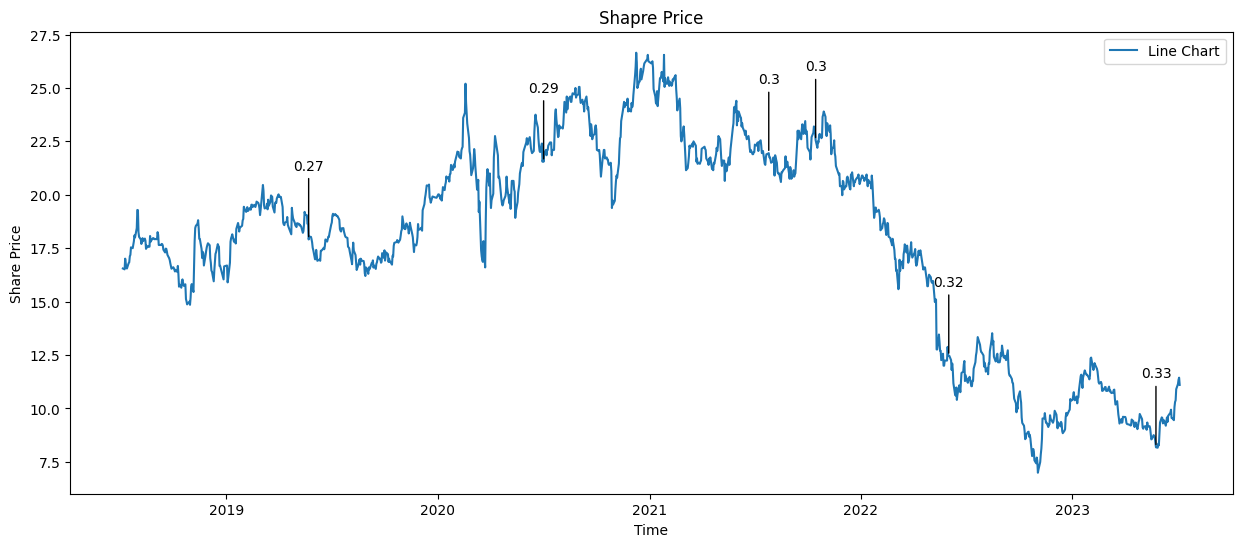

In [89]:

# Create the figure and axes
from numpy import NaN


fig, ax = plt.subplots(figsize=(15, 6))

# Plot the line chart
ax.plot(combined.index, combined.Close, label='Line Chart')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Share Price')
ax.set_title('Shapre Price')

# Add a legend
ax.legend()

# adding x ticker
#ax.set_xticks(combined.index, rotation="vertical")

# Add annotations based on the 'label' column
for i, row in annotations.iterrows():
    x = i
    y = row["Close"]
    label = row['Dividends']
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0,50), ha='center',
                arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3',facecolor='red'))

# Display the plot
plt.show()


In [68]:

# Add annotations based on the 'label' column
for i, row in combined.iterrows():
    x = i
    y = row["Close"]
    label = row['Dividends']
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Display the plot
plt.show()